# Wine quality - Exploratory data analysis

## Introduction

The dataset used in this project comes from the UCI Machine Learning Repository and contains information about white variants of the Portuguese “Vinho Verde” wine. It includes observations of wine samples, each described by physicochemical features (such as acidity, residual sugar, pH, sulphates, and alcohol content) along with a quality score (ranging from 0 to 10) assigned by wine experts based on sensory evaluation.

In [ ]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

## Load the dataset

In [ ]:
wine_quality = pd.read_csv("../data/winequality-white.csv",sep=';')
# Step for converting white space in columns to _ value for better handling
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Getting to know the dataset

In [ ]:
print(f"Dataset shape: {wine_quality.shape}")
print(f"Dataset columns: {wine_quality.columns}")

Dataset shape: (4898, 12)
Dataset columns: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
print(f"Dataset Information: {wine_quality.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Dataset Information: None


The white wine dataset has 4,898 rows and 12 columns. The following are details about columns present in the data:

1. ```fixed_acidity```:   g(tartaric acid)/dm3
2. ```volatile_acidity```:  g(acetic acid)/dm3
3. ```citric_acid```:  g/dm3
4. ```residual_sugar```: g/dm3
5. ```chlorides```: g(sodium chloride)/dm3
6. ```free_sulfur_dioxide```:  mg/dm3
7. ```total_sulfur_dioxide```: mg/dm3
8. ```density```: g/cm3
9. ```pH```: The pH scale goes from 0-14, with 0 being the most acidic and 14 the most basic
6. ```sulphates```:  g(potassium sulphate)/dm3
7. ```alcohol```: % vol.
8. ```quality```: from 0 (very bad) to 10 (excellent)

In [ ]:
# Print a sample of the dataset
wine_quality.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4382,7.0,0.24,0.26,1.7,0.041,31.0,110.0,0.99142,3.20,0.53,11.0,6
471,6.5,0.38,0.34,3.4,0.036,34.0,200.0,0.99370,3.14,0.76,10.0,5
225,7.1,0.24,0.41,17.8,0.046,39.0,145.0,0.99980,3.32,0.39,8.7,5
1336,7.8,0.29,0.36,7.0,0.042,38.0,161.0,0.99410,3.26,0.37,11.2,8
2652,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.98936,3.06,0.34,12.9,7


In [ ]:
wine_quality.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


We can see above that the table contains `quality` as dependent variable and 11 independent variables. The quality can aquire an integer value from 3 to 9, with a median value of 6.

## Check for null values

In [ ]:
# Checking for null values
wine_quality.shape
wine_quality.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


### Check for duplicates

Duplicated rows can have an impact on Linear Regression models, some of them are:

- Biased coefficients:
- Inflated model performance:

In [ ]:
duplicates = wine_quality.shape[0] - wine_quality.drop_duplicates().shape[0]

print(f"There are {duplicates} duplicated rows in the dataset")

There are 937 duplicated rows in the dataset


In [ ]:
duplicate_rows = wine_quality[wine_quality.duplicated(keep=False)]
duplicate_rows

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6


# Wine Quality Distribution

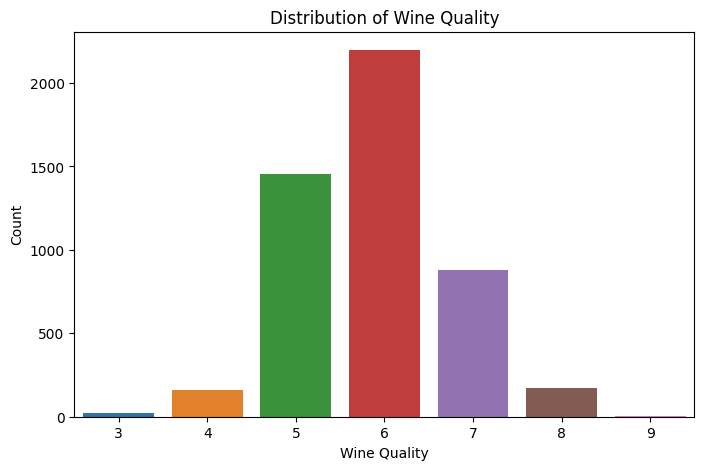

In [ ]:
# Distribution of quality
plt.figure(figsize=(8, 5))
sns.countplot(data=wine_quality, x="quality",hue="quality",palette="tab10",legend=False)
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

This plot shows the distribution of wine quality ratings in the dataset, with the x-axis representing the ratings and the y-axis showing the number of wines falling into each category. The most frequent rating is 6, indicating that a large proportion of the wines in this dataset are of average quality. Extremely high or low quality wines are rare, and the distribution appears to be slightly left-skewed, with a peak around the quality rating of 6 and a tail towards the lower quality ratings.

## Quality against each Feature Distribution

In the following graph we can observe the lower and higer quality have less representation in the dataset.

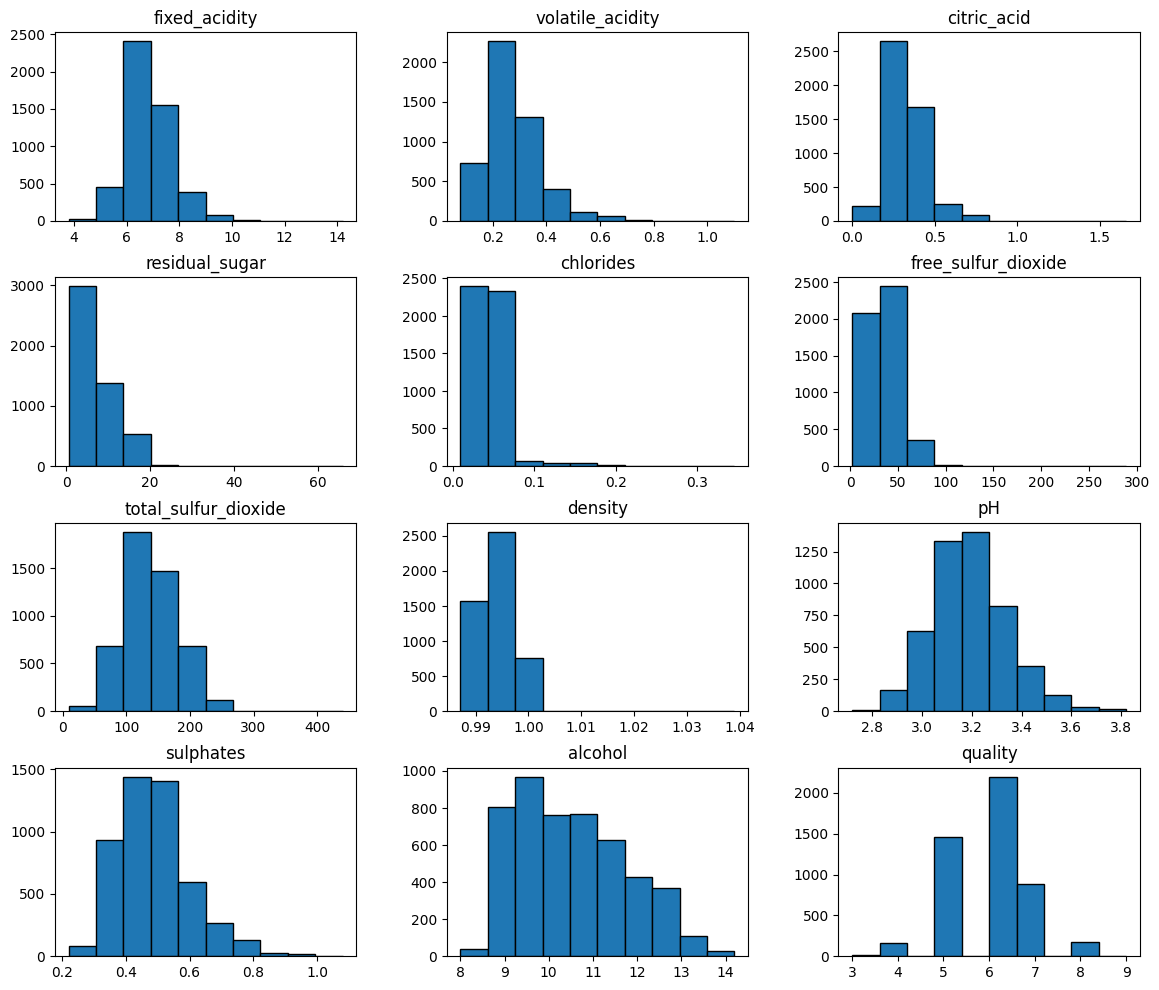

In [ ]:
wine_quality.hist(figsize=(14, 12), bins=10, edgecolor='black', grid=False);

## Interpretation of Histograms

### 1. Fixed Acidity

Distribution is slightly right-skewed, centered around 6–7 g/dm³.

Most wines have moderate fixed acidity.

A few outliers exist >10.

### 2. Volatile Acidity

Strongly right-skewed.

Most wines have low volatile acidity (<0.4 g/dm³).

High values (close to 1) are rare and may affect taste negatively.

### 3. Citric Acid

Right-skewed, many wines near 0.3 g/dm³.

Some wines have almost no citric acid, others up to 1.5 g/dm³.

High citric acid can add “freshness.”

### 4. Residual Sugar

Very right-skewed.

Majority of wines have <5 g/dm³ (dry wines).

A few extreme outliers >40 g/dm³ (very sweet wines).

### 5. Chlorides

Mostly clustered around 0.04–0.05 g/dm³.

Long right tail → some wines have much higher salt content (outliers).

### 6. Free Sulfur Dioxide

Distribution peaks between 20–50 mg/dm³.

A few extreme cases >200 mg/dm³.

Outliers may affect preservation and taste.

### 7. Total Sulfur Dioxide

Bell-shaped distribution, centered around 100–150 mg/dm³.

Outliers >300 mg/dm³ exist.

### 8. Density

Very tight distribution around 0.99–1.00 g/cm³.

Small differences are meaningful since density relates to sugar & alcohol.

### 9. pH

Nearly normal distribution, centered around 3.1–3.2.

Most wines lie between 2.9–3.4 (typical wine acidity range).

### 10. Sulphates

Peaks around 0.4–0.5 g/dm³.

Long right tail with some high-sulphate wines (>1.0).

Outliers could strongly impact preservation/quality.

### 11. Alcohol

Distribution ranges from 8% to 14%.

Slightly right-skewed, most wines cluster around 9–11%.

Higher alcohol wines are rarer but may correlate with higher quality.

### 12. Quality (Target Variable)

Discrete distribution (integer values).

Most wines are rated 5 or 6.

Very few extreme low (3–4) or high (8–9) ratings.

Confirms class imbalance (important for modeling).

## Key Takeaways

Several features (residual sugar, chlorides, sulphates, free/total sulfur dioxide) are heavily skewed with outliers → may require log transformation or scaling.

pH, alcohol, and density show tighter, more normal distributions.

Target variable quality is imbalanced, dominated by average scores (5–6).

Outliers are important to flag → they may be legit rare wines or measurement errors.

## Correlation matrix
### Explore correlation between independent variables.

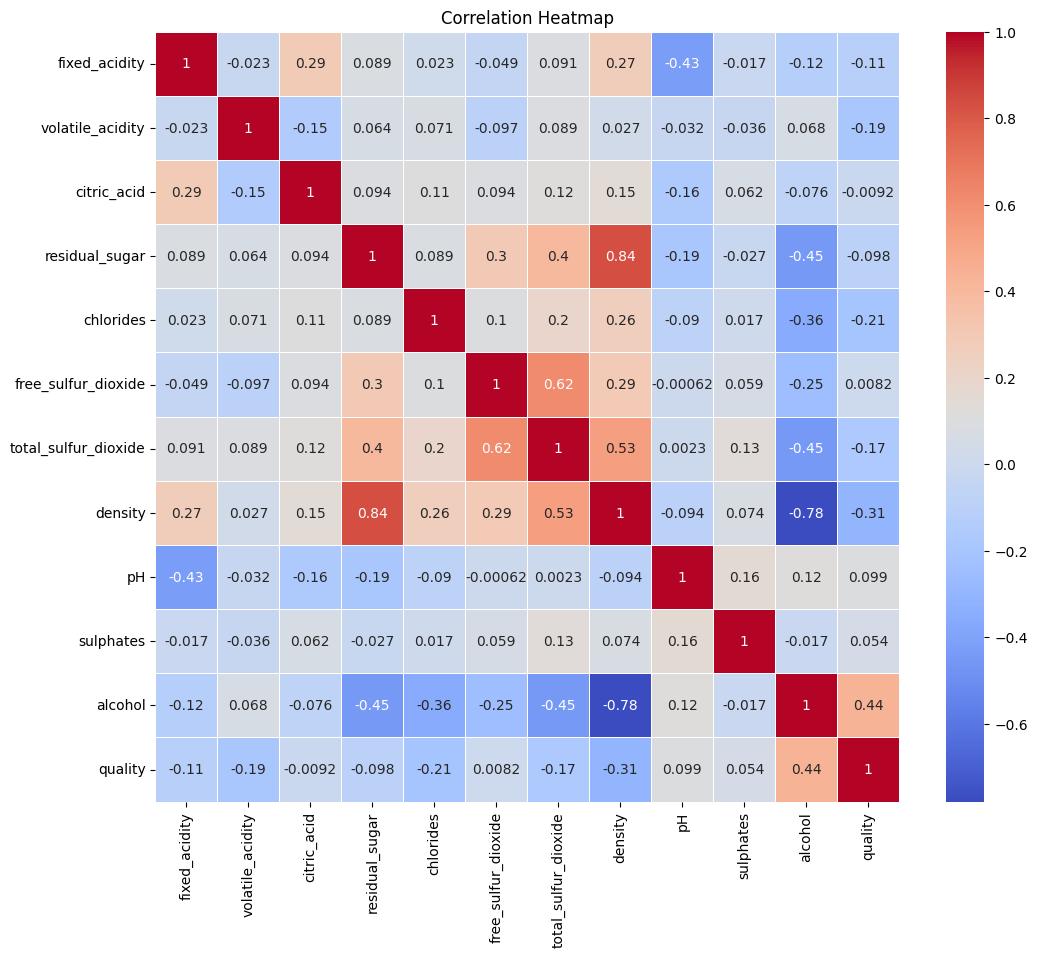

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(wine_quality.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

Listing out the features that are more correlated with quality.

In [ ]:
# Compute correlation matrix
corr_matrix = wine_quality.corr()

# Sort correlations with respect to "quality"
quality_corr = corr_matrix["quality"].sort_values(ascending=False)

print("🔹 Correlation of each feature with wine quality:\n")
print(quality_corr)

🔹 Correlation of each feature with wine quality:

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


## Interpretation of Feature–Quality Correlations

### Strongest Correlation

#### Alcohol (+0.44)

The only moderately strong positive correlation.

Higher alcohol content is strongly associated with higher wine quality.

Matches expert tasting: wines with balanced higher alcohol often feel richer.

### Weak Positive Correlations

#### pH (+0.10)

Slightly positive, but very weak.

Suggests wines with slightly higher pH (less acidic) may score marginally higher.

#### Sulphates (+0.05)

Weak positive relation.

Sulphates act as preservatives and can enhance quality a little.

### Very Weak / No Correlation

#### Free Sulfur Dioxide (+0.01) → essentially no effect.

#### Citric Acid (−0.01) → negligible relation.

Despite citric acid’s role in freshness, experts don’t weigh it heavily.

### Negative Correlations

#### Residual Sugar (−0.10)

Higher sugar levels are linked with slightly lower quality (dry wines tend to be rated higher than overly sweet ones).

#### Fixed Acidity (−0.11)

Weak negative, but higher fixed acidity doesn’t guarantee better quality.

#### Total Sulfur Dioxide (−0.17)

More SO₂ tends to lower quality.

#### Volatile Acidity (−0.19)

Noticeable negative correlation: more vinegar-like taste = worse quality.

#### Chlorides (−0.21)

Salt content negatively impacts taste and quality.

#### Density (−0.31)

Strongest negative correlation.

High density (more sugar, less alcohol) → lower perceived quality.

## Key Takeaways

Most influential predictors of quality:

🔺 Alcohol (positive)

🔻 Density (negative)

🔻 Chlorides (negative)

🔻 Volatile acidity (negative)

Other features have weak or negligible influence individually.

## Pairplots against Quality

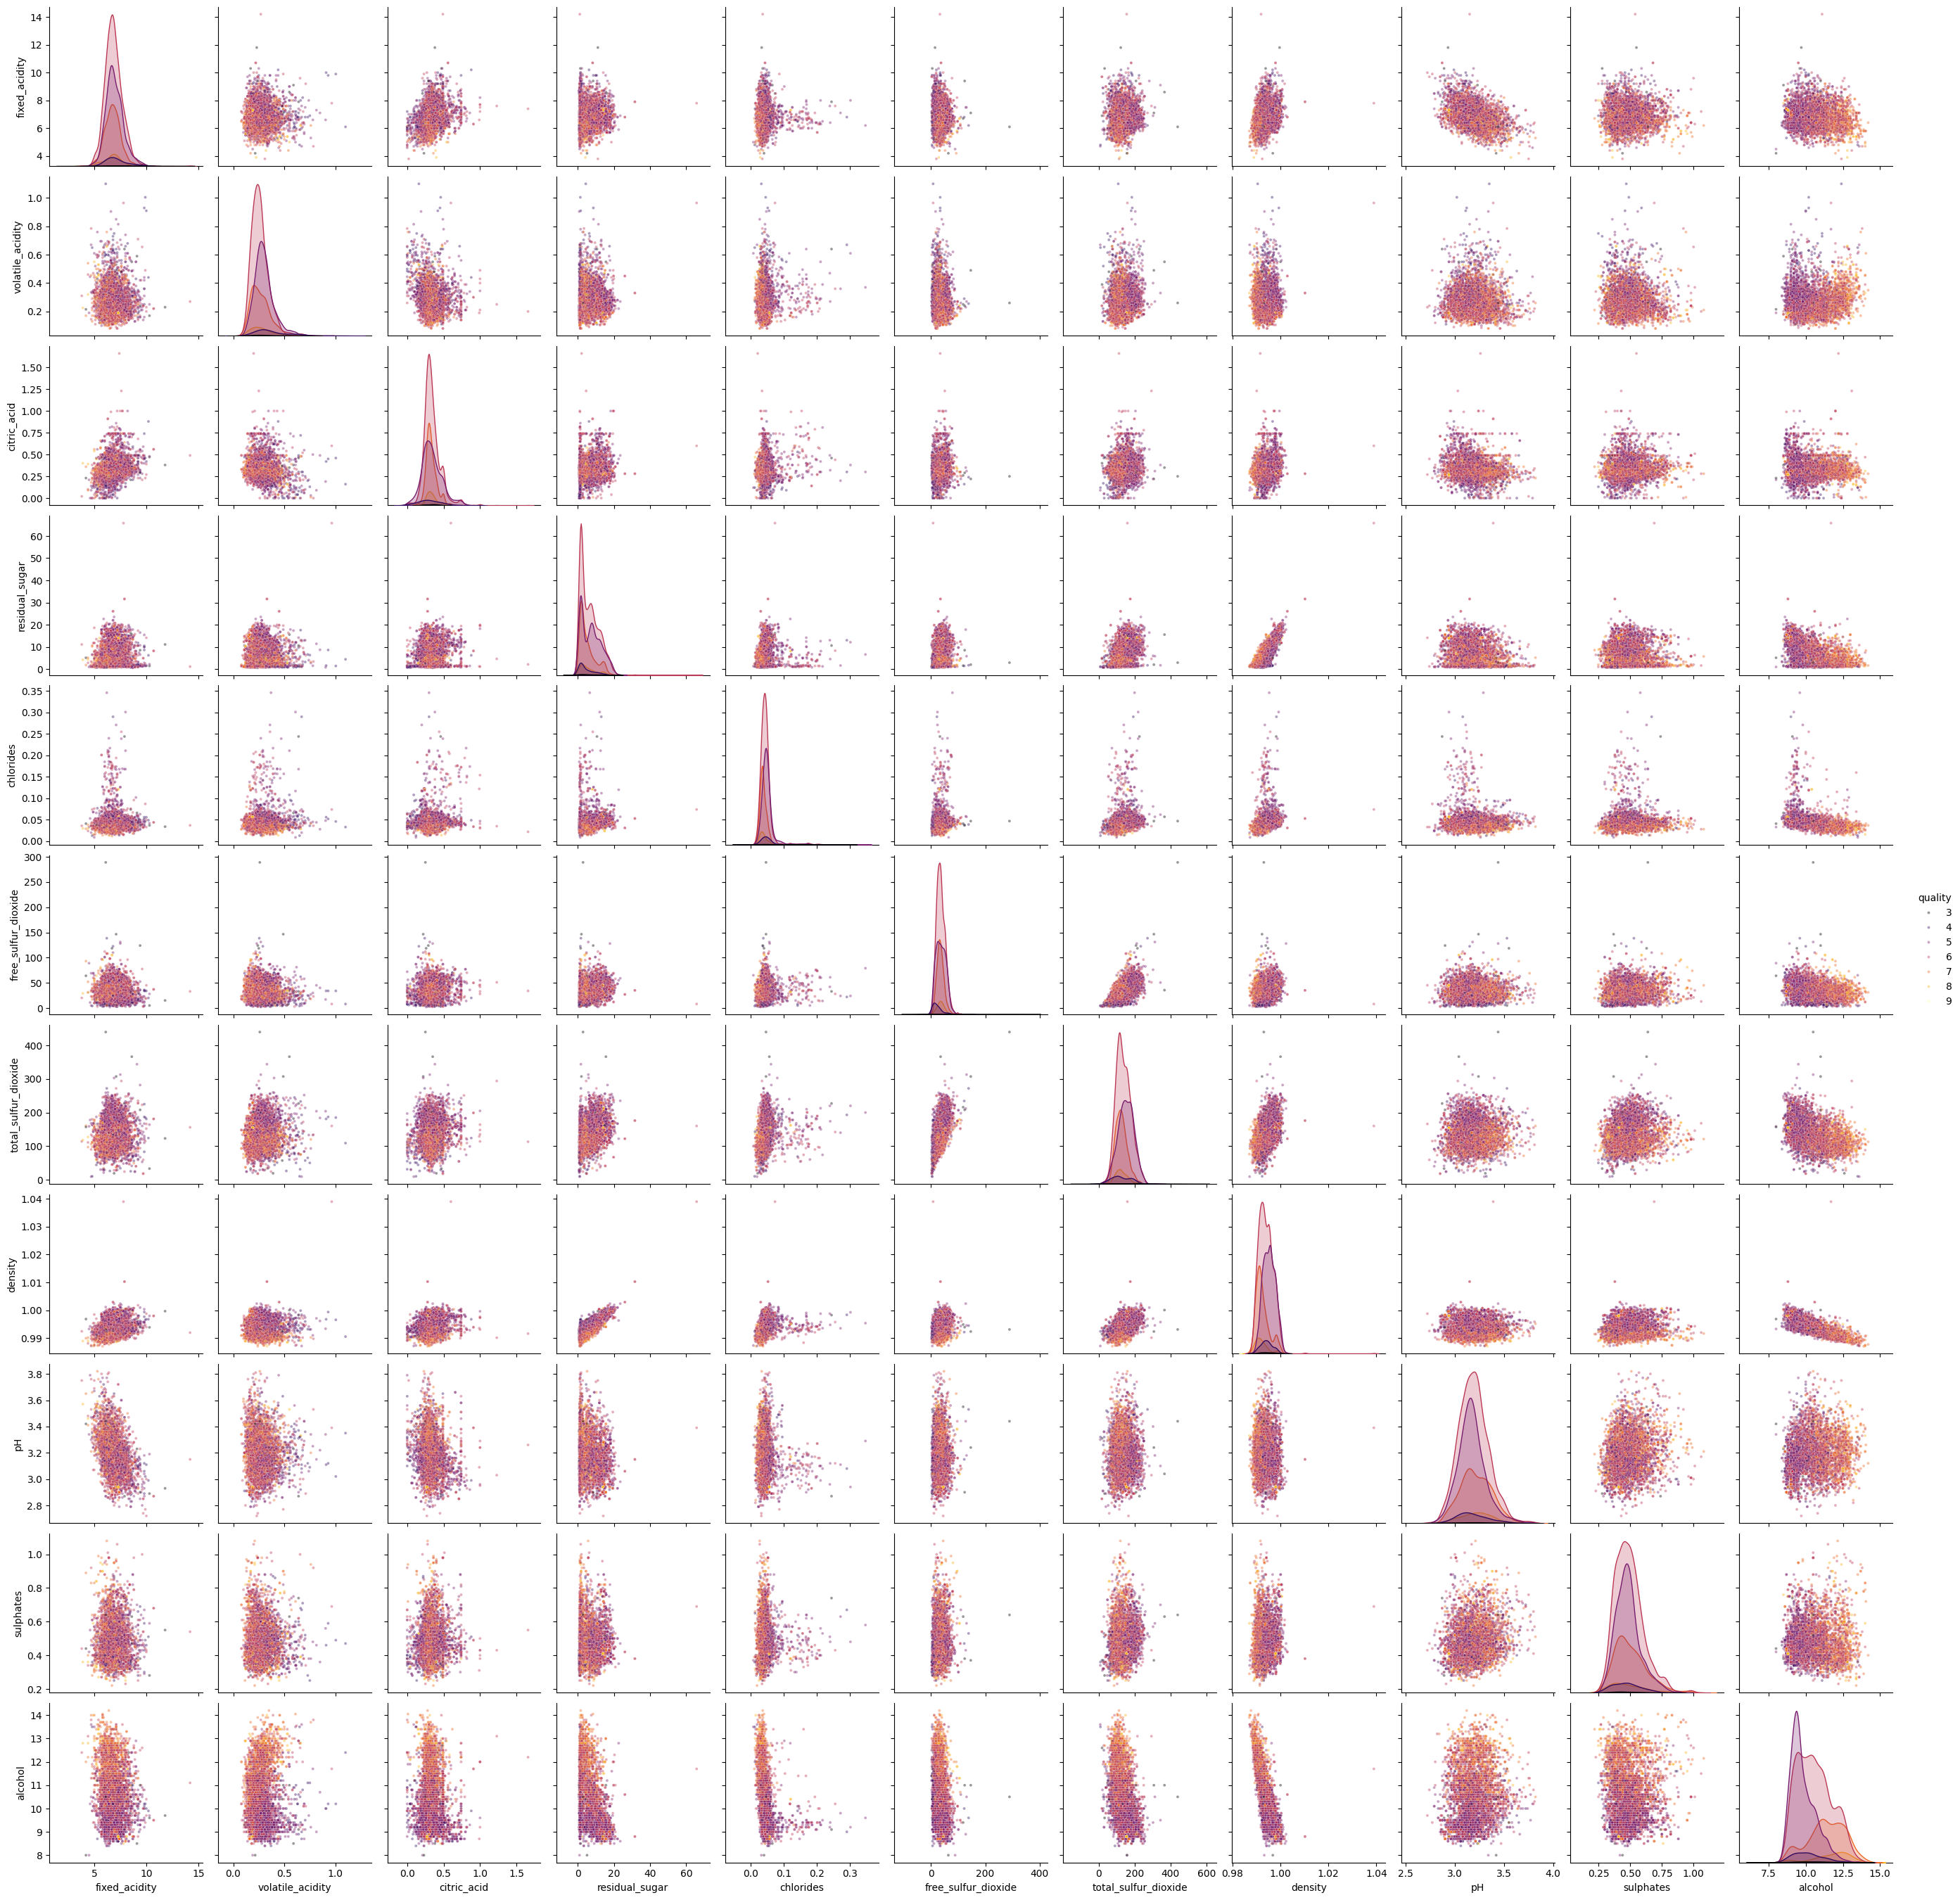

In [ ]:
# Create pair plots with color-coded data points by the 'quality' variable
sns.pairplot(wine_quality, hue='quality', palette='inferno', plot_kws={'s': 8, 'alpha': 0.4});
plt.show()

## Interpretation of Pairplots

**Fixed Acidity:** No strong separation by quality; wines across all quality levels show overlapping acidity.

**Volatile Acidity:** Higher volatile acidity is mostly linked to lower quality wines.

**Citric Acid:** Minimal influence on quality; values overlap across all ratings.

**Residual Sugar:** Majority of wines are dry, and residual sugar shows little effect on quality differences.

**Chlorides:** Higher chloride levels are associated with lower quality wines.

**Free Sulfur Dioxide:** No clear trend with quality; widely scattered across ratings.

**Total Sulfur Dioxide:** Similarly, no strong relationship with quality is visible.

**Density:** Lower density wines tend to have higher alcohol and better quality ratings.

**pH:** Very weak influence; wines across different qualities overlap significantly.

**Sulphates:** Slight tendency for higher sulphates to align with higher quality, but not strongly.

**Alcohol:** Strongest positive predictor — higher alcohol content is linked with higher quality wines.

**Quality:** Distribution is imbalanced, with most wines rated between 5 and 6.

## Conclusions

The Exploratory Data Analysis (EDA) of the White Wine Quality dataset highlights that the independent variables *do not exhibit a clear linear relationship with the target variable quality*.

Each physicochemical feature spans a wide range across different quality levels, as shown in the visualizations. This confirms that wine quality is not driven by a single feature but rather a combination of subtle interactions.

The correlation analysis indicates that alcohol has the strongest positive relationship with quality, while density, chlorides, and volatile acidity are negatively associated. Most other features show weak or negligible correlations with the target, suggesting that predictive models will need to capture non-linear and combined effects rather than relying on simple one-to-one relationships.

Distributional analysis further reveals that the majority of variables suffer from skewness. Appropriate transformations can improve the normality of these features:

`Fixed acidity:` slight right skewness → logarithmic transformation.

`Volatile acidity:` left skewness → cubic root transformation.

`Citric acid:` light left skewness → cubic root transformation.

`Residual sugar:` heavily left skewed → square root transformation.

`Chlorides:` left skewness → inverse cubic root transformation.

`Free sulfur dioxide:` left skewed → logarithmic transformation.

`Total sulfur dioxide:` light left skewness → square root transformation.

`Density:` negatively skewed; not easily correctable, but strongly correlated with alcohol (−0.78) and residual sugar (0.84). It can potentially be removed to reduce redundancy.

`pH:` light left skewness → inverse square root transformation.

`Sulphates:` left skewness → inverse cubic root transformation.

`Alcohol:` left skewness → inverse transformation improved distribution.

Overall, since left skewness is predominant across features, it is recommended to use transformed variables during model building to improve data distributions and model performance. Furthermore, density may be considered for removal due to its redundancy with alcohol and residual sugar.

In summary, the EDA confirms that wine quality is influenced by a complex interplay of multiple chemical properties, with ***alcohol*** standing out as the most significant predictor.

Addressing skewness through transformations and carefully selecting features will be critical for building robust predictive models.